In [84]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import glob
def unzip(l):
    return list(zip(*l))

In [90]:
def process_files(files):
    data = []
    for f in files:
        with open(f,"r") as f:
            raw_books = f.readlines()
            data.append(raw_books)
    y=[]
    for d in data:
        lists=d[0].split("[")[2:]
        new=[]
        for i in lists:
            new.append(i.split("]")[0])
            nnew=[]
            for n in new:
                nnew.append([float(s) for s in n.split(',')])
        y.append(np.array([np.array(xi) for xi in nnew]))
    return(y)

In [65]:
def show_GRN(network): 
    G=nx.from_numpy_matrix(network,create_using=nx.DiGraph())
    G.remove_nodes_from(list(nx.isolates(G)))
    pos = nx.circular_layout(G)
    
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] < 0]
    elm = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] >= 0.6]
    esm = [(u, v) for (u, v, d) in G.edges(data=True) if 0.6 > d['weight'] >= 0.4]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if 0.4 > d['weight'] >= 0.2]
    eextrsmall = [(u, v) for (u, v, d) in G.edges(data=True) if 0 < d['weight'] < 0.2]

    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3, alpha=0.5, edge_color='red')
    nx.draw_networkx_edges(G, pos, edgelist=elm, width=3, alpha=0.5, edge_color='black')
    nx.draw_networkx_edges(G, pos, edgelist=esm, width=3, alpha=0.5, edge_color='blue')
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=3, alpha=0.5, edge_color='green')
    nx.draw_networkx_edges(G, pos, edgelist=eextrsmall, width=3, alpha=0.5, edge_color='yellow', style='dashed')

    labels = {}    
    for node in G.nodes():
        if node in range(len(network)):
            labels[node] = node
    nx.draw_networkx_labels(G,pos,labels,font_size=16,font_color='black')

    plt.axis('off')
    #plt.show()
    
    return(G)

In [125]:
files = glob.glob('*.txt')
all_f=process_files(files)
files

['sl100e855809d_1_features.txt',
 'sl5007193f6a8_4_features.txt',
 'nc0001bd950c40_1_features.txt',
 'sl500b9245dc6_5_features.txt',
 'nc00010dca87d9_5_features.txt',
 'nc0000110f3a640_2_features.txt',
 'sl10071bfbece_3_features.txt',
 'sl500ea449419_3_features.txt',
 'sl500ad80b549_2_features.txt',
 'nc00001da49522c_3_features.txt',
 'basic4c9ebc50_3_features.txt',
 'nc0001b25f949b_3_features.txt',
 'basice0669629_1_features.txt',
 'sl100dba2ab8e_2_features.txt',
 'nc0001a165d5a5_2_features.txt',
 'nc00001e62e30a1_1_features.txt',
 'sl10006dff528_5_features.txt',
 'basic91cee786_5_features.txt',
 'nc000019f718656_5_features.txt',
 'nc00001d162c9ff_4_features.txt',
 'sl100e6236c86_4_features.txt',
 'sl5003f412f1b_1_features.txt',
 'basicdf34dd4f_2_features.txt',
 'basic9e942976_4_features.txt',
 'nc0001172bd6c8_4_features.txt']

In [99]:
files = glob.glob('basic*')
basic=process_files(files)

In [100]:
files = glob.glob('nc0001*')
med_cost=process_files(files)

In [101]:
files = glob.glob('nc00001*')
low_cost=process_files(files)

In [102]:
files = glob.glob('sl100*')
short_season=process_files(files)

In [103]:
files = glob.glob('sl500*')
long_season=process_files(files)

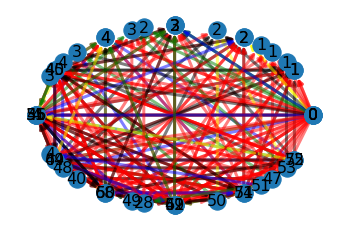

In [136]:
networks=[]
for g in long_season:
    temp=show_GRN(g)
    networks.append(temp)

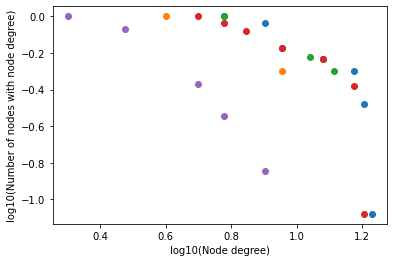

In [137]:
for n in networks:
    degree_dist=sorted(d for n, d in n.degree())
    #print(degree_dist)
    nodes, count = unzip(sorted(Counter(degree_dist).most_common(),reverse=True))
    ts = count/np.sum(count)
    ys = np.cumsum(ts)
    plt.plot(np.log10(nodes),np.log10(ys),"o",label="hey")
    #plt.legend() # plotting of the complementary cumulative distribution func-tion (CCDF)
    plt.xlabel("log10(Node degree)")
    plt.ylabel("log10(Number of nodes with node degree)")
    plt.savefig("long_season_init_res.png")

In [17]:
nx.average_clustering(G)

0.573798123900723

In [16]:
nx.density(G)

0.3888888888888889